## Aim of this project is to select the top 2 features that give the highest gross profit 

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.ensemble import RandomForestRegressor

In [2]:
## Load the dataset

In [5]:
synthetic_wtp_laptop_df = pd.read_csv("../Documents/python_for_data_science/Synthetic_Laptop_sale/synthetic_wtp_laptop_data.csv")

In [3]:
## Data Precprocessing and Cleaning

In [6]:
synthetic_wtp_laptop_df = synthetic_wtp_laptop_df.drop_duplicates()

In [7]:
synthetic_wtp_laptop_df.head()

,Memory,Storage,CPU_class,Screen_size,year,price
0,8,1024,3,16.0,2025,162021
1,32,1024,0,16.0,2024,112214
2,16,512,1,16.0,2025,118354
3,16,1024,1,16.0,2025,123383
4,16,256,3,16.0,2024,162968


In [8]:
synthetic_wtp_laptop_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Memory       1000 non-null   int64  
 1   Storage      1000 non-null   int64  
 2   CPU_class    1000 non-null   int64  
 3   Screen_size  1000 non-null   float64
 4   year         1000 non-null   int64  
 5   price        1000 non-null   int64  
dtypes: float64(1), int64(5)
memory usage: 47.0 KB


In [9]:
synthetic_wtp_laptop_df.describe()

,Memory,Storage,CPU_class,Screen_size,year,price
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,18.704000,594.688000,1.502000,15.203200,2024.524000,130315.719000
std,10.009024,319.767594,1.123948,0.864278,0.499674,32338.091721
min,8.000000,256.000000,0.000000,14.000000,2024.000000,69302.000000
25%,8.000000,256.000000,1.000000,14.000000,2024.000000,105048.000000
50%,16.000000,512.000000,1.000000,15.600000,2025.000000,130536.000000
75%,32.000000,1024.000000,3.000000,16.000000,2025.000000,158933.750000
max,32.000000,1024.000000,3.000000,16.000000,2025.000000,195617.000000


# Insight of Price Column
From the table , the price seems balanced with some slght right skew.In terms of relation , the higher price may relate to memory , storage and CPU class.While The budget-saving models are around the lower price limit (69k) , premium segment possibly price closer to the upper range.

In [10]:
synthetic_wtp_laptop_df.dropna()

,Memory,Storage,CPU_class,Screen_size,year,price
0,8,1024,3,16.0,2025,162021
1,32,1024,0,16.0,2024,112214
2,16,512,1,16.0,2025,118354
3,16,1024,1,16.0,2025,123383
4,16,256,3,16.0,2024,162968
...,...,...,...,...,...,...
995,16,256,2,15.6,2025,140531
996,16,512,1,14.0,2024,111736
997,16,1024,1,16.0,2024,121816
998,32,256,1,16.0,2024,127886


In [11]:
synthetic_wtp_laptop_df.isnull().sum()

Memory         0
Storage        0
CPU_class      0
Screen_size    0
year           0
price          0
dtype: int64

In [12]:
synthetic_wtp_laptop_df["price"].astype

<bound method NDFrame.astype of 0      162021
1      112214
2      118354
3      123383
4      162968
        ...  
995    140531
996    111736
997    121816
998    127886
999    140834
Name: price, Length: 1000, dtype: int64>

In [13]:
# Define base specifications
base_specs = {
    "Memory": 16,
    "Storage": 512,
    "CPU_class": 1,
    "Screen_size": 14.0
}

for feature, base_value in base_specs.items():
    upgrade_cols = f"upgrade_{feature.lower()}"
    synthetic_wtp_laptop_df[upgrade_cols] = (synthetic_wtp_laptop_df[feature]>base_value).astype(int)

In [14]:
synthetic_wtp_laptop_df.head()

,Memory,Storage,CPU_class,Screen_size,year,price,upgrade_memory,upgrade_storage,upgrade_cpu_class,upgrade_screen_size
0,8,1024,3,16.0,2025,162021,0,1,1,1
1,32,1024,0,16.0,2024,112214,1,1,0,1
2,16,512,1,16.0,2025,118354,0,0,0,1
3,16,1024,1,16.0,2025,123383,0,1,0,1
4,16,256,3,16.0,2024,162968,0,0,1,1


In [15]:
upgrade_cost = {
    "Memory": 7000,
    "Storage": 5000,
    "CPU_class": 15000,
    "Screen_size": 3000
}

synthetic_wtp_laptop_df["upgrade_costs"]  = sum(synthetic_wtp_laptop_df[f"upgrade_{feature.lower()}"]*cost
                                               for feature,cost in upgrade_cost.items())

synthetic_wtp_laptop_df["gross_profit"] = synthetic_wtp_laptop_df["price"]-synthetic_wtp_laptop_df["upgrade_costs"]

In [16]:
upgrade_df = synthetic_wtp_laptop_df.loc[:,'upgrade_memory':'gross_profit']

In [17]:
upgarded_cols = [features for features in upgrade_df.columns.to_list()][:-2]

In [6]:
## Choosing the model

In [18]:
# Features = Upgrades, Target = Gross Profit
X = upgrade_df[upgarded_cols]
y = upgrade_df["gross_profit"]

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train model
model = LinearRegression()
model.fit(X_train, y_train)

# Get coefficients
coefs = pd.Series(model.coef_, index=upgarded_cols)
print(coefs.sort_values(ascending=False))

upgrade_cpu_class      38685.982643
upgrade_memory         13976.170860
upgrade_storage         3216.062612
upgrade_screen_size     -165.516080
dtype: float64


In [19]:
model = RandomForestRegressor(random_state=42)
model.fit(X_train, y_train)

# Feature importance
importance_df = pd.DataFrame({
    'Feature': upgarded_cols,
    'Importance': model.feature_importances_
}).sort_values(by='Importance', ascending=False)

In [7]:
## Evaulating the model

In [20]:
predictions = model.predict(X_test)
mse = mean_squared_error(y_test, predictions)
rmse = np.sqrt(mse)
print(f"Mean Squared Error (MSE): {mse}")
print(f"Root Mean Squared Error (RMSE) : {rmse}")

Mean Squared Error (MSE): 225687171.64458904
Root Mean Squared Error (RMSE) : 15022.888259072855


In [9]:
## Plotting selected features

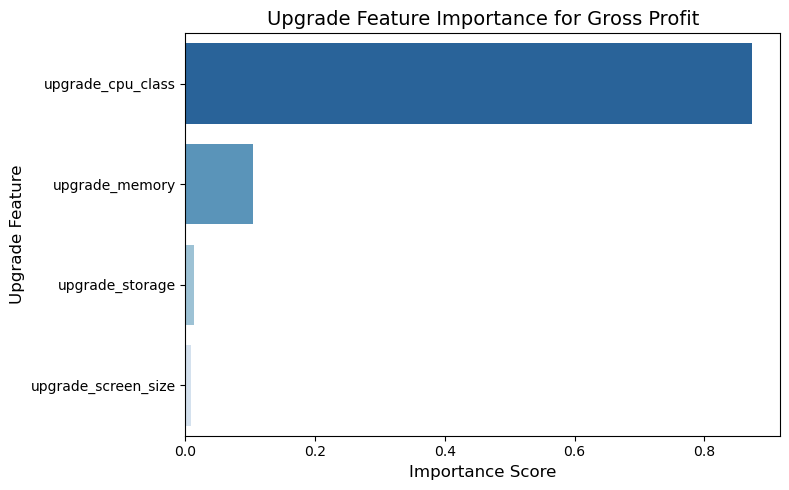

In [21]:
# Plot with seaborn
plt.figure(figsize=(8, 5))
sns.barplot(data=importance_df, x='Importance', y='Feature', hue='Feature' , palette='Blues_r')
plt.title("Upgrade Feature Importance for Gross Profit", fontsize=14)
plt.xlabel("Importance Score", fontsize=12)
plt.ylabel("Upgrade Feature", fontsize=12)
plt.tight_layout()
plt.show()

The chart shows that CPU_Class_Upgrade have the highest impact on gross profit with an importance score far exceeding all other features, indicating the most influential factor for profitability. While memory contributes moderately , but with much smaller , storage and screen size have the least influence on gross profit.

Overall , enhancing CPU is likely the most effective and productive strategy to maximize gross proft , followed by memory improvements , whereas storage and screen size have the lowest impact in revenue terms.